### 문제 4.2

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
d = {'a':[1,2,3], 'b':[4,5],'c':[6,7,8]}
d.items()

dict_items([('a', [1, 2, 3]), ('b', [4, 5]), ('c', [6, 7, 8])])

In [19]:
l = pd.DataFrame(dict([(k, pd.Series(v)) for k,v in d.items()]))
l # 데이터 프레임 제작 시 빈칸을 NA로 만드는 코드, 원하는 결과가 나오지 않음

,a,b,c
0,1,4.0,6
1,2,5.0,7
2,3,NaN,8


In [82]:
str = ["Blackouts, Brittle system, Butterfly effect, Byzantine failure, Cascading rollback, Chain reaction, Chaos theory, Cache stampede, Congestion collapse,\
Domino effect, For Want of a Nail (proverb), Network science, Network theory, Interdependent networks, Kessler Syndrome, Percolation theory,\
Progressive collapse, Virtuous circle and vicious circle, Wicked problem"]

In [84]:
d = pd.DataFrame({'Cascading failure':[str[0].split(',')]})
d # 한 노드의 전체 이웃을 가져와 분할, 하지만 묶여서 나와서 실패

,Cascading failure
0,"[Blackouts, Brittle system, Butterfly effect..."


### 엑셀 활용

In [58]:
a = pd.read_excel('data/wiki.xlsx', header = None)

In [59]:
a

,0,1,2
0,Network science,Cascading failure,Blackouts
1,Network science,Cascading failure,Brittle system
2,Network science,Cascading failure,Butterfly effect
3,Network science,Cascading failure,Byzantine failure
4,Network science,Cascading failure,Cascading rollback
...,...,...,...
270,Network science,Random networks,Flow graph
271,Network science,Random networks,Max-flow min-cut theorem
272,Network science,Random networks,Oriented matroid
273,Network science,Random networks,Shortest path problem


In [87]:
a.isnull().sum() # 결측치 확인

0    0
1    0
2    8
dtype: int64

In [78]:
a[a[2].isnull()] # Network science 이웃의 링크가 없는 경우 

,0,1,2
34,Network science,Rumor spread in social network,NaN
44,Network science,Networks in labor economics,NaN
58,Network science,Immune network theory,NaN
59,Network science,Non-linear preferential attachment,NaN
65,Network science,Communicative ecology,NaN
178,Network science,Dual-phase evolution,NaN
253,Network science,Network formation,NaN
264,Network science,Network theory in risk assessment,NaN


In [157]:
b = a.replace(np.nan, 'None')
b.isnull().sum()

0    0
1    0
2    0
dtype: int64

In [158]:
b

,0,1,2
0,Network science,Cascading failure,Blackouts
1,Network science,Cascading failure,Brittle system
2,Network science,Cascading failure,Butterfly effect
3,Network science,Cascading failure,Byzantine failure
4,Network science,Cascading failure,Cascading rollback
...,...,...,...
270,Network science,Random networks,Flow graph
271,Network science,Random networks,Max-flow min-cut theorem
272,Network science,Random networks,Oriented matroid
273,Network science,Random networks,Shortest path problem


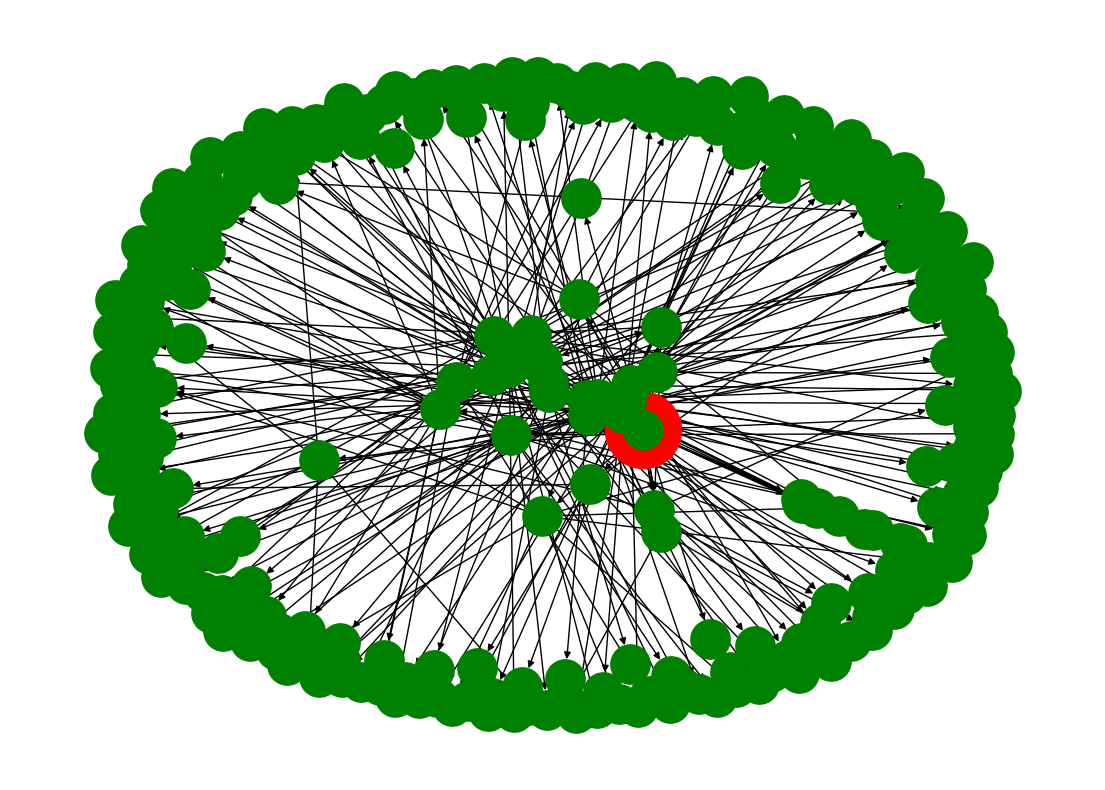

In [164]:
# 그림 크기 설정
plt.rcParams["figure.figsize"] = [14,10]

# Network Science의 그래프
g = nx.from_pandas_edgelist(b,0,1, create_using=nx.DiGraph())

# Network Science 이웃의 그래프
h = nx.from_pandas_edgelist(b,1,2, create_using=nx.DiGraph())

# 결합
u = nx.compose(g,h) 

ego = 'Network science'
pos = nx.spring_layout(u)

options = {"node_size":3000, "node_color":"r"}
nx.draw_networkx_nodes(u, pos, nodelist=[ego],**options) # ego 노드 크기와 색상 별도 설정

nx.draw(u, pos, node_color = 'green', node_size = 800) 
plt.show()

### 3번 문제

True

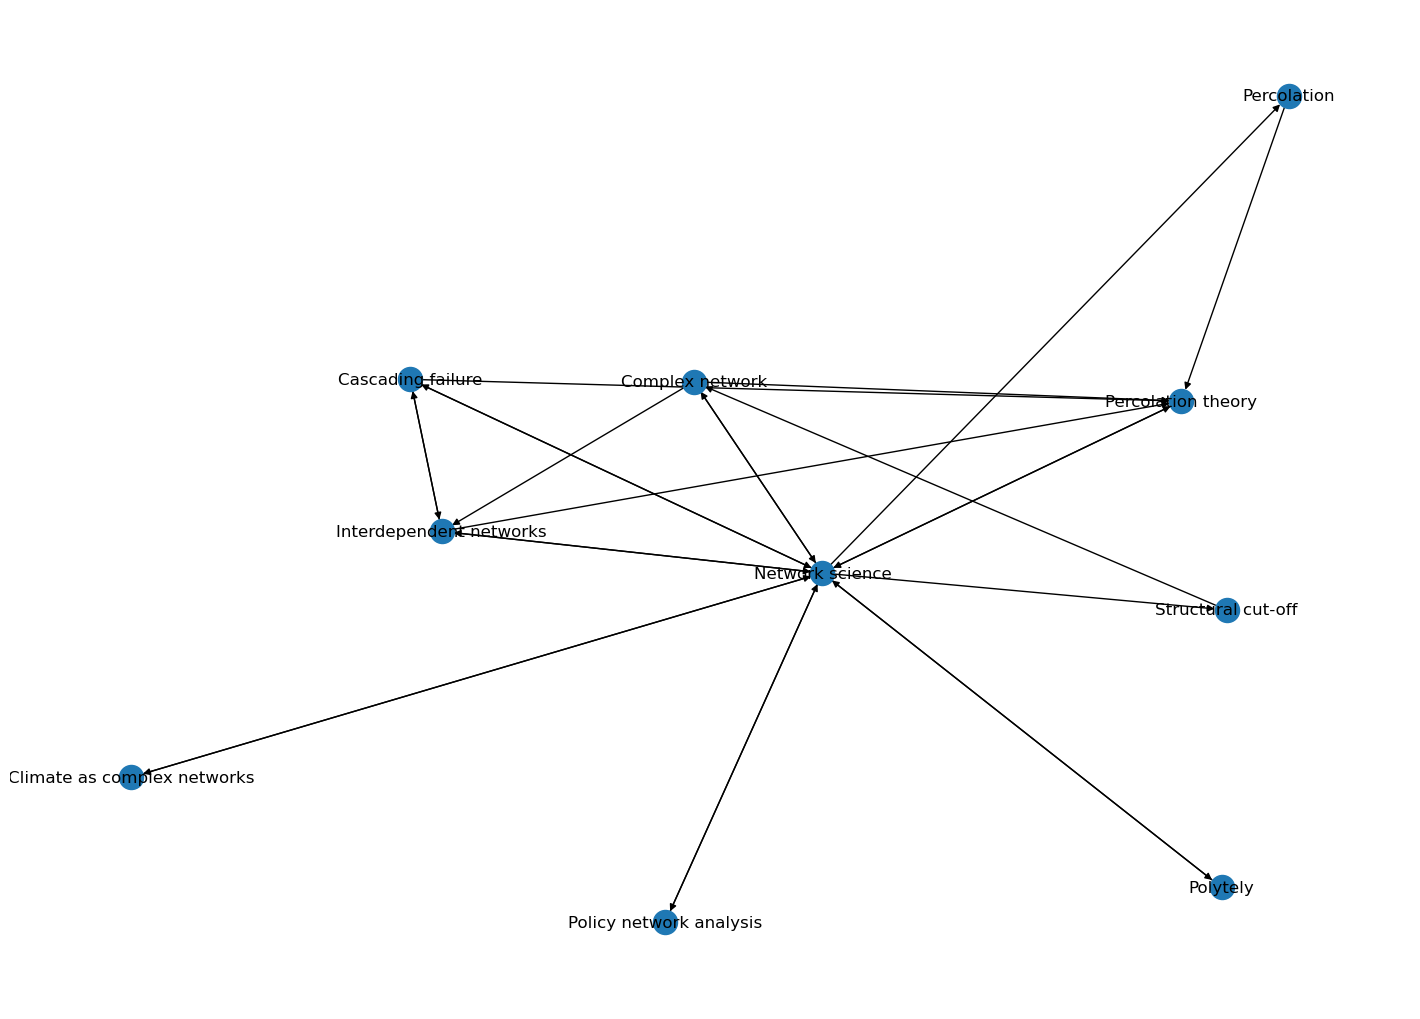

In [161]:
comps = sorted(nx.strongly_connected_components(u),key=len, reverse=True)
nodes_in_giant_comp = comps[0]
gc = nx.subgraph(u, nodes_in_giant_comp)
nx.draw(gc, with_labels = True)
nx.is_strongly_connected(gc)

### 4번 문제

In [169]:
out_degree_val = dict(u.out_degree())
del(out_degree_val['None'])
ans = []

for key, value in out_degree_val.items():
    if value == max(out_degree_val.values()) :
        ans.append(key)
print(ans)

['Systems theory']


### 5번 문제

In [168]:
in_degree_val = dict(u.in_degree())
del(in_degree_val['None'])
ans = []

for key, value in in_degree_val.items():
    if value == max(in_degree_val.values()) :
        ans.append(key)
print(ans)

['Network science']


### 문제 4.4

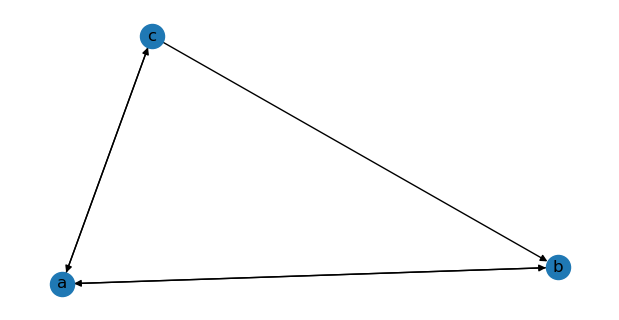

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

s = nx.DiGraph()
s.add_edges_from([
    ('a','b'),('a','c'),
    ('b','a'),
    ('c','a'),('c','b')
])

plt.rcParams["figure.figsize"] = [6,3]
nx.draw(s, with_labels = True)

In [12]:
# 승훈 => define 함수

pg = {'a': 0.3333333333333333, 'b': 0.3333333333333333, 'c': 0.3333333333333333} # 초기값 선언

def pgrank(pg1,pg2,pg3,tf,n) : # pg1 : 페이지 링크, tf : 순간이동 , n : 페이지 수 개수
  pr_a = pg2+pg3/2
  pr_b = pg1/2+pg3/2
  pr_c = pg1/2
  pg['a'] = tf/n +(1-tf)*pr_a
  pg['b'] = tf/n +(1-tf)*pr_b
  pg['c'] = tf/n +(1-tf)*pr_c
  print(pg)

In [17]:
pgrank(pg['a'],pg['b'],pg['c'],0,3)

{'a': 0.4444444293067551, 'b': 0.33333333333333337, 'c': 0.22222223735991167}


In [14]:
nx.pagerank(s, alpha = 1)

{'a': 0.4444440205891927, 'b': 0.3333333333333333, 'c': 0.22222264607747394}

In [16]:
print(pg)
for idx in range(1,20):
    pgrank(pg['a'],pg['b'],pg['c'],0,3)
    print("idx :",idx,pg)

{'a': 0.428571426608015, 'b': 0.33333333333333337, 'c': 0.23809524005865174}
{'a': 0.45238095336265927, 'b': 0.33333333333333337, 'c': 0.2142857133040075}
idx : 1 {'a': 0.45238095336265927, 'b': 0.33333333333333337, 'c': 0.2142857133040075}
{'a': 0.4404761899853371, 'b': 0.33333333333333337, 'c': 0.22619047668132963}
idx : 2 {'a': 0.4404761899853371, 'b': 0.33333333333333337, 'c': 0.22619047668132963}
{'a': 0.4464285716739982, 'b': 0.33333333333333337, 'c': 0.22023809499266855}
idx : 3 {'a': 0.4464285716739982, 'b': 0.33333333333333337, 'c': 0.22023809499266855}
{'a': 0.44345238082966765, 'b': 0.33333333333333337, 'c': 0.2232142858369991}
idx : 4 {'a': 0.44345238082966765, 'b': 0.33333333333333337, 'c': 0.2232142858369991}
{'a': 0.4449404762518329, 'b': 0.33333333333333337, 'c': 0.22172619041483382}
idx : 5 {'a': 0.4449404762518329, 'b': 0.33333333333333337, 'c': 0.22172619041483382}
{'a': 0.44419642854075025, 'b': 0.33333333333333337, 'c': 0.22247023812591646}
idx : 6 {'a': 0.44419642

In [7]:
# 동현 => 행렬 곱

import numpy as np

p = np.array(
    [[0,1,0.5],
     [0.5,0,0.5],
     [0.5,0,0]]
)

x = np.array([0.33,0.33,0.33])

for idx, _ in enumerate(range(15)):
    x = p.dot(x)
    print("no.",idx)
    print(x)

no. 0
[0.495 0.33  0.165]
no. 1
[0.4125 0.33   0.2475]
no. 2
[0.45375 0.33    0.20625]
no. 3
[0.433125 0.33     0.226875]
no. 4
[0.4434375 0.33      0.2165625]
no. 5
[0.43828125 0.33       0.22171875]
no. 6
[0.44085938 0.33       0.21914063]
no. 7
[0.43957031 0.33       0.22042969]
no. 8
[0.44021484 0.33       0.21978516]
no. 9
[0.43989258 0.33       0.22010742]
no. 10
[0.44005371 0.33       0.21994629]
no. 11
[0.43997314 0.33       0.22002686]
no. 12
[0.44001343 0.33       0.21998657]
no. 13
[0.43999329 0.33       0.22000671]
no. 14
[0.44000336 0.33       0.21999664]


### 문제 4.5

In [198]:
nx.pagerank(s, alpha=0.8) # 순간이동 계수 0.2

{'a': 0.42857117291861335, 'b': 0.33333333333333337, 'c': 0.23809549374805336}

In [18]:
pgrank(pg['a'],pg['b'],pg['c'],0.2,3)

{'a': 0.42222222827729805, 'b': 0.33333333333333337, 'c': 0.2444444383893687}


In [19]:
print(pg)
for idx in range(1,20):
    pgrank(pg['a'],pg['b'],pg['c'],0.2,3)
    print("idx :",idx,pg)

{'a': 0.42222222827729805, 'b': 0.33333333333333337, 'c': 0.2444444383893687}
{'a': 0.43111110868908087, 'b': 0.33333333333333337, 'c': 0.23555555797758587}
idx : 1 {'a': 0.43111110868908087, 'b': 0.33333333333333337, 'c': 0.23555555797758587}
{'a': 0.4275555565243677, 'b': 0.33333333333333337, 'c': 0.23911111014229902}
idx : 2 {'a': 0.4275555565243677, 'b': 0.33333333333333337, 'c': 0.23911111014229902}
{'a': 0.428977777390253, 'b': 0.33333333333333337, 'c': 0.23768888927641374}
idx : 3 {'a': 0.428977777390253, 'b': 0.33333333333333337, 'c': 0.23768888927641374}
{'a': 0.42840888904389884, 'b': 0.33333333333333337, 'c': 0.2382577776227679}
idx : 4 {'a': 0.42840888904389884, 'b': 0.33333333333333337, 'c': 0.2382577776227679}
{'a': 0.42863644438244053, 'b': 0.33333333333333337, 'c': 0.2380302222842262}
idx : 5 {'a': 0.42863644438244053, 'b': 0.33333333333333337, 'c': 0.2380302222842262}
{'a': 0.42854542224702386, 'b': 0.33333333333333337, 'c': 0.23812124441964289}
idx : 6 {'a': 0.4285454

### 문제 4.7

In [191]:
math = nx.read_graphml('data/enwiki_math.graphml.gz')

In [192]:
rank = nx.pagerank(math)
res = [key for (key, value) in sorted(rank.items(), key = lambda x:x[1], reverse= True)] # pagerank가 높은 key를 순서대로 출력
print(res[:10])

['18831', '1152126', '18902', '198822', '1485646', '26685', '20120951', '1234374', '24295969', '48396']


In [197]:
math_in_degree = dict(math.in_degree())
res = [key for (key, value) in sorted(math_in_degree.items(), key = lambda x:x[1], reverse= True)]
print(res[:10])

['1152126', '18831', '18902', '1485646', '198822', '1234374', '20120951', '48396', '627842', '24295969']


## 트위터 api

### 1.1 앱 정보 입력 및 인증 URL 얻기

In [1]:
from twython import Twython

In [2]:
api_key = 'Z8ShlmOyVQlmhx5zg21sMWYOb'
api_secret_key = '0QVcRtmwfC1gAzwUPXeomLBF8EEAOOmuvOzP4vL9NBZ9tPYXh1'

twitter = Twython(api_key, api_secret_key)
authentication_tokens = twitter.get_authentication_tokens()
print(authentication_tokens['auth_url'])

https://api.twitter.com/oauth/authenticate?oauth_token=b6nI1gAAAAABh_HGAAABg8JRoK0


### 1.2 인증자 PIN을 사용하여 앱 승인

In [3]:
verifier = '7022978' # 위의 링크로 접속하면 확인 가능
twitter = Twython(api_key, api_secret_key,
                  authentication_tokens['oauth_token'],
                  authentication_tokens['oauth_token_secret'])

authorized_tokens = twitter.get_authorized_tokens(verifier)

### 1.3 승인된 토큰 사용

In [4]:
twitter = Twython(api_key, api_secret_key,
                  authorized_tokens['oauth_token'],
                  authorized_tokens['oauth_token_secret'])

twitter.verify_credentials()

{'id': 1579124435046797313,
 'id_str': '1579124435046797313',
 'name': '이동현',
 'screen_name': 'networkscience_',
 'location': '',
 'description': '',
 'url': None,
 'entities': {'description': {'urls': []}},
 'protected': False,
 'followers_count': 0,
 'friends_count': 1,
 'listed_count': 0,
 'created_at': 'Sun Oct 09 14:59:51 +0000 2022',
 'favourites_count': 0,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': False,
 'verified': False,
 'statuses_count': 0,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': 'F5F8FA',
 'profile_background_image_url': None,
 'profile_background_image_url_https': None,
 'profile_background_tile': False,
 'profile_image_url': 'http://pbs.twimg.com/profile_images/1579124490713575424/ikn4v0PJ_normal.png',
 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1579124490713575424/ikn4v0PJ_normal.png',
 'profile_link_color': '1DA1F2',
 'profile_sidebar_bord

### 2.1 사용자 객체

In [213]:
user = twitter.show_user(screen_name = 'clayadavis')
user

{'id': 1548959833,
 'id_str': '1548959833',
 'name': 'Clayton A Davis',
 'screen_name': 'clayadavis',
 'location': 'Brooklyn, NY',
 'profile_location': {'id': '011add077f4d2da3',
  'url': 'https://api.twitter.com/1.1/geo/id/011add077f4d2da3.json',
  'place_type': 'unknown',
  'name': 'Brooklyn, NY',
  'full_name': 'Brooklyn, NY',
  'country_code': '',
  'country': '',
  'contained_within': [],
  'bounding_box': None,
  'attributes': {}},
 'description': 'I build things! Worked on @Botometer, @KinseyReporter, & @OSoMe_IU in my PhD; co-authored "A First Course in Network Science" from Cambridge Univ. Press.',
 'url': 'http://t.co/RUAIyVFd1X',
 'entities': {'url': {'urls': [{'url': 'http://t.co/RUAIyVFd1X',
     'expanded_url': 'http://clayadavis.net',
     'display_url': 'clayadavis.net',
     'indices': [0, 22]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 294,
 'friends_count': 183,
 'listed_count': 13,
 'created_at': 'Wed Jun 26 19:34:59 +0000 2013',
 'f

In [215]:
print(user['friends_count'], user['followers_count'])

183 294


In [217]:
print("""
Twitter user @{screen_name}
has {followers_count} followers,
follows {friends_count} users,
and has tweeted {statuses_count} times.
""".format(**user))


Twitter user @clayadavis
has 294 followers,
follows 183 users,
and has tweeted 487 times.



### 2.2 Tweet 객체

In [218]:
most_recent_tweet = user['status']
most_recent_tweet

{'created_at': 'Tue Feb 08 15:15:58 +0000 2022',
 'id': 1491068291309203462,
 'id_str': '1491068291309203462',
 'text': 'RT @lshlj: https://t.co/w18NLJAEaJ It’s out now—the book I co-translated (1/6) with great network scientists in Korea, from https://t.co/uv…',
 'truncated': False,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [{'screen_name': 'lshlj',
    'name': 'Sang Hoon Lee (이상훈)',
    'id': 43831302,
    'id_str': '43831302',
    'indices': [3, 9]}],
  'urls': [{'url': 'https://t.co/w18NLJAEaJ',
    'expanded_url': 'http://www.yes24.com/Product/Goods/105847780',
    'display_url': 'yes24.com/Product/Goods/…',
    'indices': [11, 34]}]},
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'geo': None,
 'coordinates': None,
 'place': None,
 'contribu

In [219]:
most_recent_tweet['text']

'RT @lshlj: https://t.co/w18NLJAEaJ It’s out now—the book I co-translated (1/6) with great network scientists in Korea, from https://t.co/uv…'

In [220]:
most_recent_tweet['entities']

{'hashtags': [],
 'symbols': [],
 'user_mentions': [{'screen_name': 'lshlj',
   'name': 'Sang Hoon Lee (이상훈)',
   'id': 43831302,
   'id_str': '43831302',
   'indices': [3, 9]}],
 'urls': [{'url': 'https://t.co/w18NLJAEaJ',
   'expanded_url': 'http://www.yes24.com/Product/Goods/105847780',
   'display_url': 'yes24.com/Product/Goods/…',
   'indices': [11, 34]}]}

In [221]:
most_recent_tweet['entities']['user_mentions']

[{'screen_name': 'lshlj',
  'name': 'Sang Hoon Lee (이상훈)',
  'id': 43831302,
  'id_str': '43831302',
  'indices': [3, 9]}]

### 3.1 해시태그와 일치하는 트윗 받기

In [231]:
search_response = twitter.search(q = '#science', count = 100)

In [233]:
search_tweets = search_response['statuses']
tweet = search_tweets[0]
tweet

{'created_at': 'Sun Oct 09 16:17:53 +0000 2022',
 'id': 1579144128318697474,
 'id_str': '1579144128318697474',
 'text': '👉 $25.95 👈\nWOW Skin Science Apple Cider Vinegar Shampoo Conditioner  Men Womens Gentle Shampoo @buy1_best\n#WOW… https://t.co/SX8XVSmAMq',
 'truncated': True,
 'entities': {'hashtags': [{'text': 'WOW', 'indices': [106, 110]}],
  'symbols': [],
  'user_mentions': [{'screen_name': 'buy1_best',
    'name': 'Stylish Lady',
    'id': 1118057594281758720,
    'id_str': '1118057594281758720',
    'indices': [95, 105]}],
  'urls': [{'url': 'https://t.co/SX8XVSmAMq',
    'expanded_url': 'https://twitter.com/i/web/status/1579144128318697474',
    'display_url': 'twitter.com/i/web/status/1…',
    'indices': [112, 135]}]},
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'source': '<a href="https://bestbuy.a777.com/" rel="nofollow">Media uploads app</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_re

In [234]:
tweet['user']

{'id': 1118057594281758720,
 'id_str': '1118057594281758720',
 'name': 'Stylish Lady',
 'screen_name': 'buy1_best',
 'location': 'New York, NY',
 'description': 'Always #young #ladies are here. Join us now. Be always young :)',
 'url': 'https://t.co/SJVOSdGFzu',
 'entities': {'url': {'urls': [{'url': 'https://t.co/SJVOSdGFzu',
     'expanded_url': 'http://bestbuy.a777web.com',
     'display_url': 'bestbuy.a777web.com',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 8940,
 'friends_count': 7714,
 'listed_count': 40,
 'created_at': 'Tue Apr 16 07:44:37 +0000 2019',
 'favourites_count': 211013,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': False,
 'verified': False,
 'statuses_count': 600232,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': '000000',
 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
 'prof

### 3.2 커서를 사용하여 검색에서 100개 이상의 트윗을 얻기

In [235]:
search_response = twitter.search(q = '#science', count = 1000) # 천개를 써도 거의 100개를 얻음
len(search_response['statuses'])

100

In [236]:
import itertools

from numpy import result_type

num_tweets_to_fetch = 1000

cursor = twitter.cursor(twitter.search, q = '#science', count = 100, result_type = 'mixed')
search_tweets = list(itertools.islice(cursor, num_tweets_to_fetch))
len(search_tweets)

1000

- 커서 객체는 '게을러지게' 항목을 생성하는 반복기의 일종, itertools.islice를 사용해 생성기에 설정된 수의 항목을 가져옴

- islice에 전달된 두 번째 인수는 사용자로부터 가져오려는 최대 트윗 수

- 100개 이상의 트윗을 받고 싶어도 count = 100 인수를 사용, 이것은 cursor가 각 api 호출과 함께 최대 트윗수를 가져오도록 지시

- mixed를 사용하면 쿼리에 일치하는 최근 트윗과 인기 트윗이 혼합

- 더 많은 랜덤한 샘플을 원하면 result_type = 'twitter'를 사용, 하지만 원하는 것보다 적은 수의 트윗 제공 가능

- count를 100이상으로 쓰는 것은 올바르지 않음


In [237]:
type(cursor)

generator

### 3.3 API 메서드 속도 제한

In [238]:
twitter.get_application_rate_limit_status()['resources']['search']

{'/search/tweets': {'limit': 180, 'remaining': 167, 'reset': 1665333179}}

- 이러한 제한은 가져온 항목 수와 반대로 API 호출 수에 적
- 따라서 커서를 만들 때 count=를 지정하여 API 호출당 최대 항목 수를 가져옴

### 4. 소셜 네트워크 그래프 만들기

In [241]:
import networkx as nx

d = nx.DiGraph()

publisher = twitter.show_user(screen_name = 'CambridgeUP')
author = twitter.show_user(screen_name = 'osome_iu')

d.add_edge(publisher['screen_name'], author['screen_name'], weight = 1)

[('CambridgeUP', 'OSoMe_IU', {'weight': 1})]

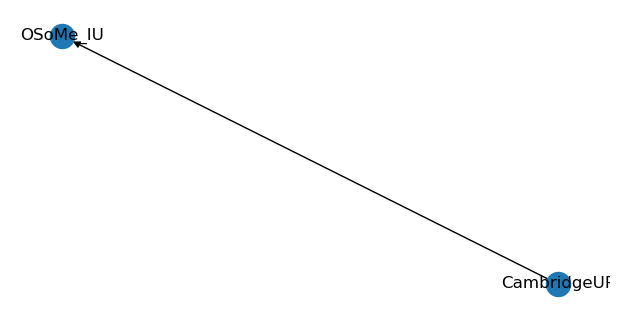

In [244]:
nx.draw(d, with_labels = True)
list(d.edges(data = True))

### 5. 트위터 리트윗 네트워크

- 해시태그와 일치하는 트윗을 가져와 대화의 리트윗 네트워크 제작

1. 일부 트윗 가져오기

In [245]:
import itertools

num_tweets_to_fetch = 1000

cursor = twitter.cursor(twitter.search, q = '#science', count = 100, result_type = 'mixed')
search_tweets = list(itertools.islice(cursor, num_tweets_to_fetch))
len(search_tweets)

1000

2. 리트윗 필터링

In [247]:
retweets = []

for tweet in search_tweets:
    if 'retweeted_status' in tweet :
        retweets.append(tweet)
len(retweets)

556

3. 방향성 그래프 제작

In [250]:
import networkx as nx

d = nx.DiGraph()

for retweet in retweets :
    retweeted_status = retweet['retweeted_status']
    retweeted_sn = retweeted_status['user']['screen_name']
    retweeter_sn = retweet['user']['screen_name']
    
    # 링크 방향 : retweeted_sn -> retweeter_sn
    if d.has_edge(retweeted_sn, retweeter_sn):
        d.edges[retweeted_sn, retweeter_sn]['weight'] += 1
    else :
        d.add_edge(retweeted_sn, retweeter_sn, weight = 1)    

4. 그래프 분석

In [252]:
max(d.nodes, key = d.out_degree()) # Most retweeted user

'chrost_hugo'

In [254]:
from operator import itemgetter

sorted(d.out_degree(), key = itemgetter(1), reverse= True)[:5] # 리트윗을 받는 상위 5명

[('chrost_hugo', 32),
 ('HolzheuStefan', 19),
 ('In_Otter_News2', 13),
 ('maxplanckpress', 11),
 ('sorae_jp', 10)]

In [255]:
sorted(d.out_degree(weight = 'weight'), key = itemgetter(1), reverse= True)[:5] # 가중치 포함

[('chrost_hugo', 35),
 ('HolzheuStefan', 19),
 ('In_Otter_News2', 13),
 ('AgiwaldW', 13),
 ('byLilyV', 12)]

In [257]:
# 이상치 탐지

sorted(d.in_degree(weight = 'weight'), key = itemgetter(1), reverse= True)[:5]

[('B0tSci', 17),
 ('sBhupen52', 8),
 ('nod3bot', 7),
 ('odobehave', 7),
 ('YOSEquehacer2_', 7)]

- 다른 사용자보다 훨씬 더 많은 리트윗을 하는 사용자 감지
- 소셜 미디어 조작(스팸) 의심 가능

5. 연결성

In [260]:
print(nx.is_strongly_connected(d), nx.is_weakly_connected(d))

False False


In [277]:
print(nx.number_weakly_connected_components(d),nx.number_strongly_connected_components(g))
# 약하게 연결된 덩어리의 각 구성 요소는 대화를 의미

200 909


6. 시각화

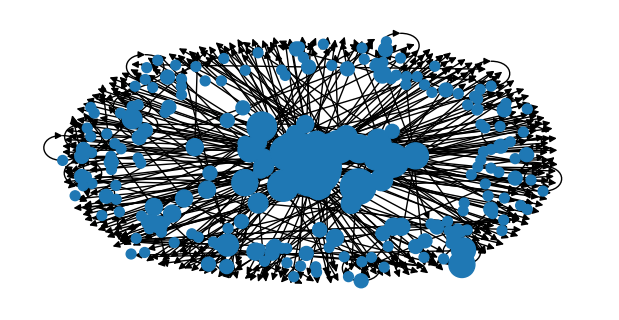

In [264]:
node_sizes = [d.out_degree(n, weight= 'weight') * 50 for n in d.nodes()]

%matplotlib inline
nx.draw(d, node_size = node_sizes) # 리트윗 된 사용자만 도식화

### 6. 트위터 멘션 네트워크

- 사용자 간의 또 다른 트위터 상호작용은 한 사용자가 @screen_name으로 트윗에서 다른 사용자를 언급할 때 발생

1. 일부 트윗 가져오기

In [265]:
import itertools

num_tweets_to_fetch = 1000

cursor = twitter.cursor(twitter.search, q = '#science', count = 100, result_type = 'mixed')
search_tweets = list(itertools.islice(cursor, num_tweets_to_fetch))
len(search_tweets)

1000

2. 방향성 그래프 제작

In [267]:
import networkx as nx

g = nx.DiGraph()

for tweet in search_tweets :
    tweet_sn = tweet['user']['screen_name']
    for user_mention in tweet['entities']['user_mentions']:
        mentioned_sn = user_mention['screen_name']
        
        my_edge = (tweet_sn, mentioned_sn)
        if g.has_edge(*my_edge):
            g.edges[my_edge]['weight'] += 1
        else :
            g.add_edge(*my_edge, weight = 1)

3. 그래프 분석

In [268]:
max(g.nodes, key =g.in_degree) # 가장 인기 있는 사용자

'chrost_hugo'

In [270]:
from operator import itemgetter

sorted(g.in_degree(weight='weight'), key = itemgetter(1), reverse=True)[:5]

[('chrost_hugo', 39),
 ('HolzheuStefan', 19),
 ('In_Otter_News2', 13),
 ('AgiwaldW', 13),
 ('NeuroscienceNew', 11)]

In [272]:
# 이상치 탐지(conversation driver)

sorted(g.out_degree(weight='weight'), key=itemgetter(1), reverse=True)[:5]

[('B0tSci', 23),
 ('jayaisales', 10),
 ('GtrFascination', 9),
 ('sBhupen52', 8),
 ('AmyMhmd', 7)]

- 대화에서 많은 다른 사람들을 언급하는 사용자는 스팸일 가능성이 있음

4. 연결성

In [274]:
print(nx.is_weakly_connected(g), nx.is_strongly_connected(g))

False False


In [276]:
print(nx.number_weakly_connected_components(g), nx.number_strongly_connected_components(g))

255 909


5. 시각화

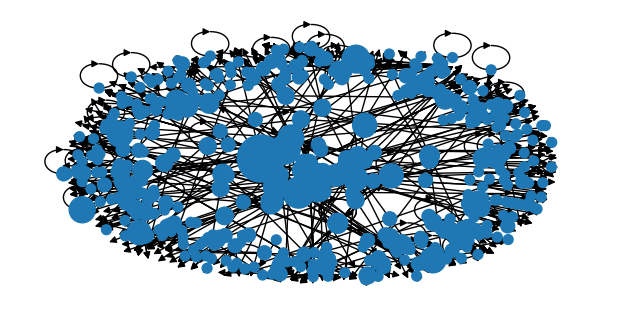

In [278]:
node_sizes = [g.out_degree(n, weight='weight') * 50 for n in g.nodes]

%matplotlib inline
nx.draw(g, node_size=node_sizes)

### 문제 4.9

In [222]:
from twython import Twython

api_key = 'Z8ShlmOyVQlmhx5zg21sMWYOb'
api_secret_key = '0QVcRtmwfC1gAzwUPXeomLBF8EEAOOmuvOzP4vL9NBZ9tPYXh1'
access_token = '1579124435046797313-rnP1yuuah3XyrBLp6j2QLWZlso7NsK'
access_token_secret = 'AOO5T1BhSBff3yAIWzbkpi16dB2ANk2C2zXb0va535c7R'

twitter = Twython(api_key, api_secret_key,
                  access_token, access_token_secret)

### 1번 문제

In [223]:
user = twitter.show_user(screen_name = 'clayadavis')
user['friends_count']

183

### 2번 문제

In [228]:
import itertools

user = twitter.show_user(screen_name = 'clayadavis')
num_tweets = user['friends_count']
cursor = twitter.cursor(twitter.get_friends_list,
                        screen_name = 'clayadavis', count = 200)

friends = list(itertools.islice(cursor, num_tweets))

followers = {}

for friend in friends:
    followers[friend['screen_name']] = friend['followers_count']
    
from statistics import mean, median

print(user['followers_count'], round(mean(followers.values())))
    

293 220776


### 3번 문제

In [229]:
print(user['followers_count'], median(followers.values()))

293 3934


### 4번 문제

In [230]:
max(followers, key = followers.get)

'BernieSanders'